In [ ]:
#import eksplor dan analisis data
import pandas as pd
import numpy as np

#library untuk membuat grafik data
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk membangun model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Library untuk mengukur akurasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score


EKSPLORASI DAN VISUALISASI DATA

In [ ]:
#import data dari google drive
! gdown --id 1Jp1aXq54biFrNrg69CBC7KtrZRehGBWx

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Jp1aXq54biFrNrg69CBC7KtrZRehGBWx
To: /content/Train.csv
100% 257M/257M [00:03<00:00, 71.8MB/s]


In [ ]:
#import data dari google drive
! gdown --id 1asP8OCi7w5XnFhhpjPSxEhc_N3ckWNkj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1asP8OCi7w5XnFhhpjPSxEhc_N3ckWNkj
To: /content/Test.csv
100% 70.2M/70.2M [00:01<00:00, 50.7MB/s]


In [ ]:
#read data
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [ ]:
#cek informasi data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083761 entries, 0 to 1083760
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1083761 non-null  int64  
 1   income                        1006395 non-null  float64
 2   email_similarity              1062827 non-null  float64
 3   address_months_count          1083761 non-null  int64  
 4   current_address_months_count  1083761 non-null  int64  
 5   age                           1035122 non-null  float64
 6   days_request                  986424 non-null   float64
 7   initial_amount                931110 non-null   float64
 8   payment                       981326 non-null   object 
 9   zip_count                     1024860 non-null  float64
 10  app_6h                        1024294 non-null  float64
 11  app_24h                       931552 non-null   float64
 12  app_4w                      

In [ ]:
#cek informasi data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286803 entries, 0 to 286802
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            286803 non-null  int64  
 1   income                        278205 non-null  float64
 2   email_similarity              276210 non-null  float64
 3   address_months_count          286803 non-null  int64  
 4   current_address_months_count  286803 non-null  int64  
 5   age                           283195 non-null  float64
 6   days_request                  277455 non-null  float64
 7   initial_amount                275867 non-null  float64
 8   payment                       281879 non-null  object 
 9   zip_count                     277314 non-null  float64
 10  app_6h                        276594 non-null  float64
 11  app_24h                       278339 non-null  float64
 12  app_4w                        281762 non-nul

In [ ]:
df_train['credit_limit'] = df_train['credit_limit'].astype(object)

In [ ]:
#mengecek data duplikat pada data train
df_train[df_train.duplicated()]

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
5583,624985,0.1,0.757809,-1,82,40.0,0.005175,-0.602103,AC,1346.0,...,200.0,1.0,INTERNET,4.487130,windows,0.0,1.0,NaN,6.0,1
5753,84155,0.2,0.466246,-1,35,30.0,NaN,-1.250656,AB,551.0,...,NaN,0.0,INTERNET,3.491043,other,1.0,1.0,NaN,NaN,1
7802,98418,0.7,0.328449,-1,56,20.0,0.012346,-1.432073,AB,694.0,...,200.0,0.0,INTERNET,1.606831,linux,0.0,1.0,0.0,7.0,1
11089,331720,0.9,0.695503,-1,49,30.0,0.020216,NaN,AB,896.0,...,1000.0,0.0,INTERNET,6.471288,macintosh,0.0,1.0,NaN,0.0,1
11753,18647,0.4,0.096335,-1,102,20.0,0.018581,-1.294412,NaN,1986.0,...,500.0,0.0,INTERNET,2.306350,linux,0.0,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083722,804106,NaN,0.102237,-1,74,NaN,0.007568,-1.136035,AC,3139.0,...,1500.0,0.0,INTERNET,7.743090,windows,NaN,1.0,0.0,2.0,1
1083730,663078,0.8,0.808890,-1,59,30.0,NaN,NaN,AB,936.0,...,200.0,0.0,INTERNET,1.225819,linux,1.0,1.0,0.0,1.0,1
1083734,238034,0.9,0.193131,-1,37,30.0,0.005035,6.952412,NaN,872.0,...,200.0,0.0,INTERNET,7.406576,windows,0.0,2.0,0.0,0.0,1
1083750,326626,NaN,0.529530,-1,165,20.0,0.019335,NaN,AB,1152.0,...,1000.0,NaN,INTERNET,4.134805,windows,0.0,1.0,0.0,0.0,1


In [ ]:
#drop data duplikat pada data train
df_train = df_train.drop_duplicates()

In [ ]:
#cek kembali informasi mengenai data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023690 entries, 0 to 1083759
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1023690 non-null  int64  
 1   income                        950689 non-null   float64
 2   email_similarity              1003915 non-null  float64
 3   address_months_count          1023690 non-null  int64  
 4   current_address_months_count  1023690 non-null  int64  
 5   age                           977810 non-null   float64
 6   days_request                  931598 non-null   float64
 7   initial_amount                879556 non-null   float64
 8   payment                       926904 non-null   object 
 9   zip_count                     968067 non-null   float64
 10  app_6h                        967526 non-null   float64
 11  app_24h                       879831 non-null   float64
 12  app_4w                      

In [ ]:
#mengganti nilai -1 menjadi missing value pada data train
df_train.replace(-1, np.nan, inplace = True)

In [ ]:
#melihat banyaknya missing value pada data train
df_train.isna().sum()

id                                   0
income                           73001
email_similarity                 19775
address_months_count            755397
current_address_months_count      3960
age                              45880
days_request                     92092
initial_amount                  144134
payment                          96786
zip_count                        55623
app_6h                           56164
app_24h                         143859
app_4w                           44426
total_app_8w                     38477
distinct_birth_emails           106591
employment                       28029
credit_score                     83602
email_status                     47357
housing                          85294
phone_status                     64787
mobile_status                    63028
bank_months                     384963
other_cards                      21752
credit_limit                     18887
foreign                          64032
source_of_application    

In [ ]:
#mendefinisikan kolom kategorik pada dataframe
categorical_cols = [cname for cname in df_train.columns if df_train[cname].dtype == "object"]
categorical_cols

['payment',
 'employment',
 'housing',
 'credit_limit',
 'source_of_application',
 'os']

In [ ]:
#mendefinisikan kolom numerik pada dataframe
numerical_cols = [cname for cname in df_train.columns if df_train[cname].dtype in ['int64', 'float64']]
numerical_cols

['id',
 'income',
 'email_similarity',
 'address_months_count',
 'current_address_months_count',
 'age',
 'days_request',
 'initial_amount',
 'zip_count',
 'app_6h',
 'app_24h',
 'app_4w',
 'total_app_8w',
 'distinct_birth_emails',
 'credit_score',
 'email_status',
 'phone_status',
 'mobile_status',
 'bank_months',
 'other_cards',
 'foreign',
 'session_length',
 'keep_alive',
 'distinct_device_emails',
 'device_fraud',
 'month_of_application',
 'fraud']

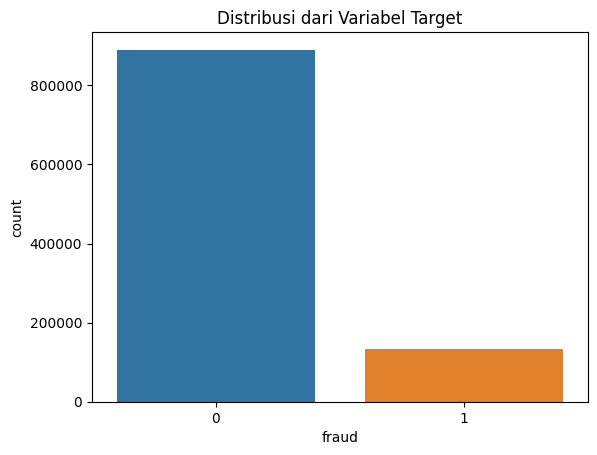

In [ ]:
#melihat distribusi dari variabel target
sns.countplot(x=df_train['fraud'], data=df_train)
plt.title("Distribusi dari Variabel Target")
plt.show()

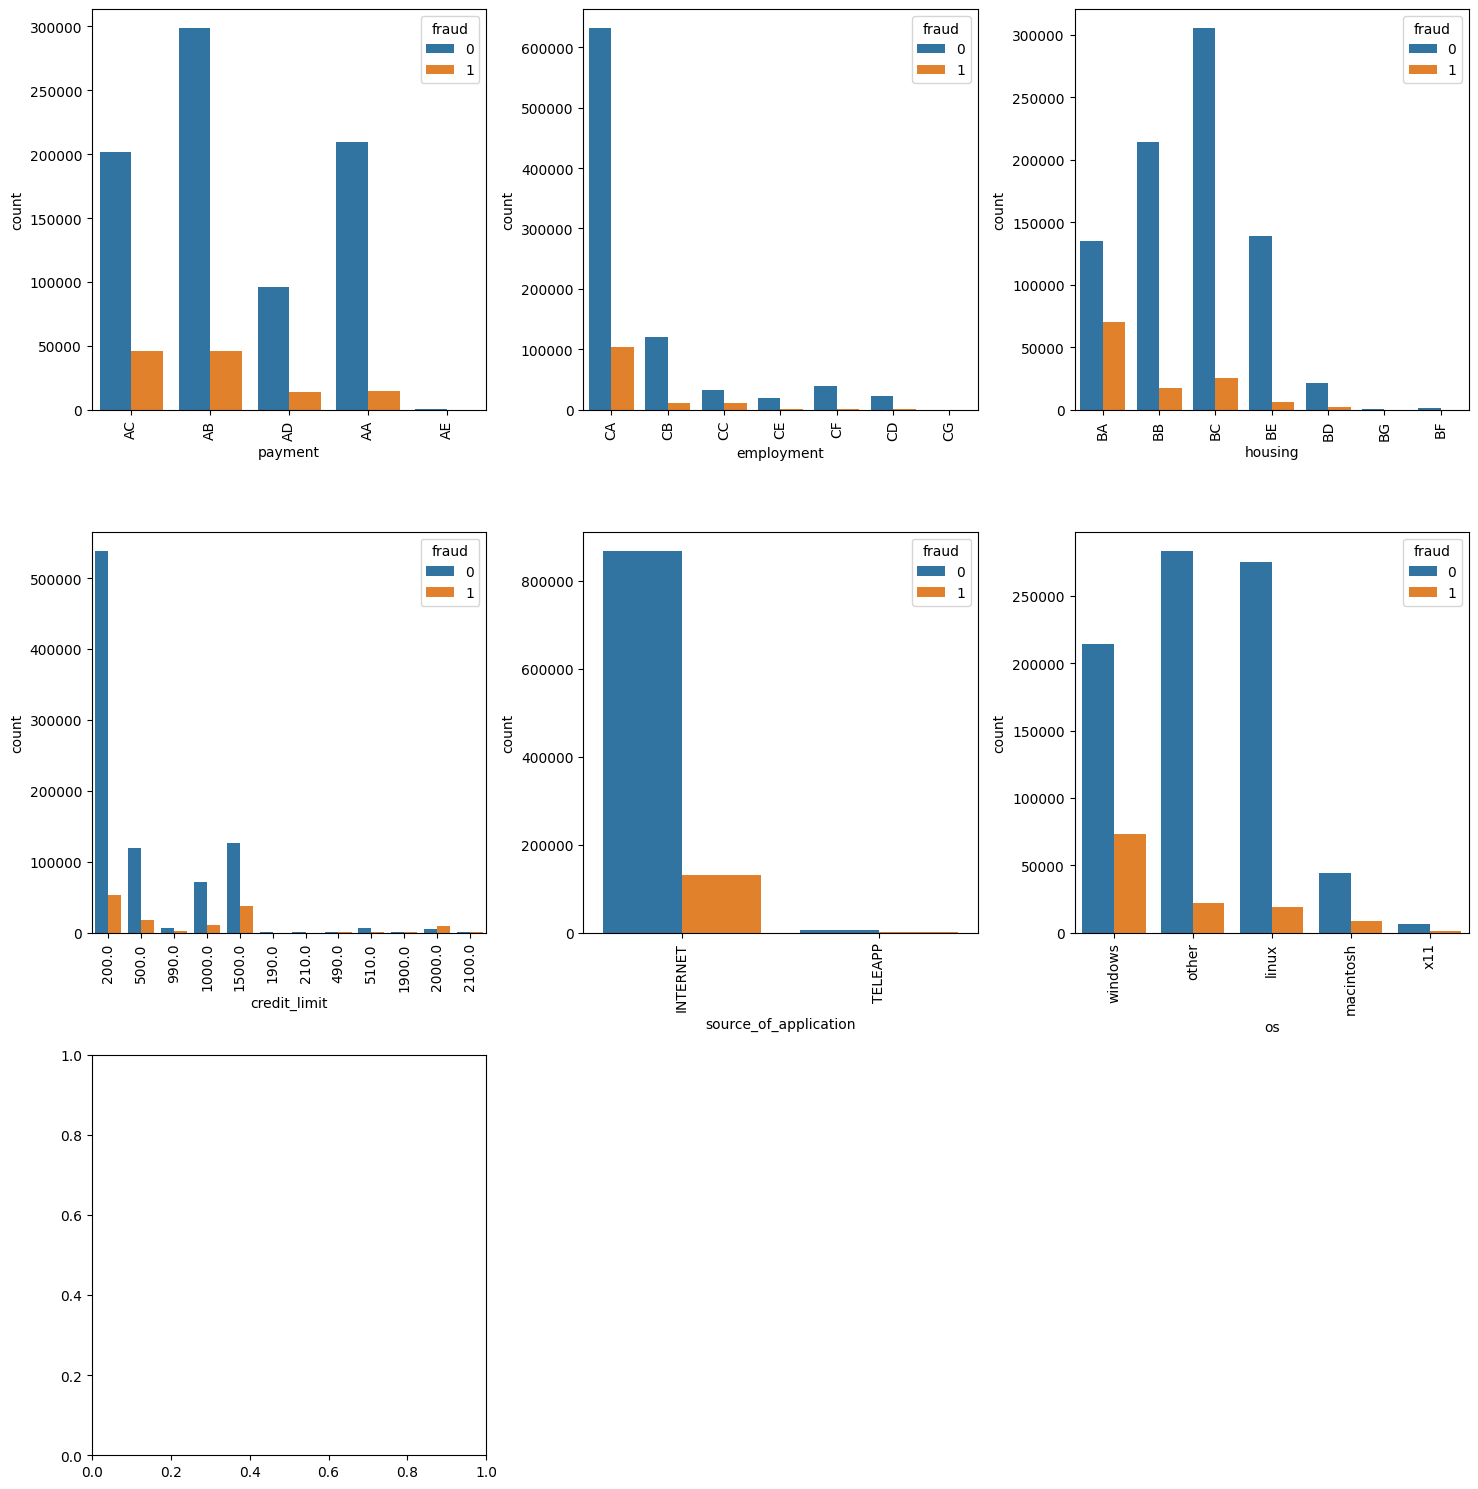

In [ ]:
# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(categorical_cols):
    sns.countplot(x=var, hue='fraud', data=df_train, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

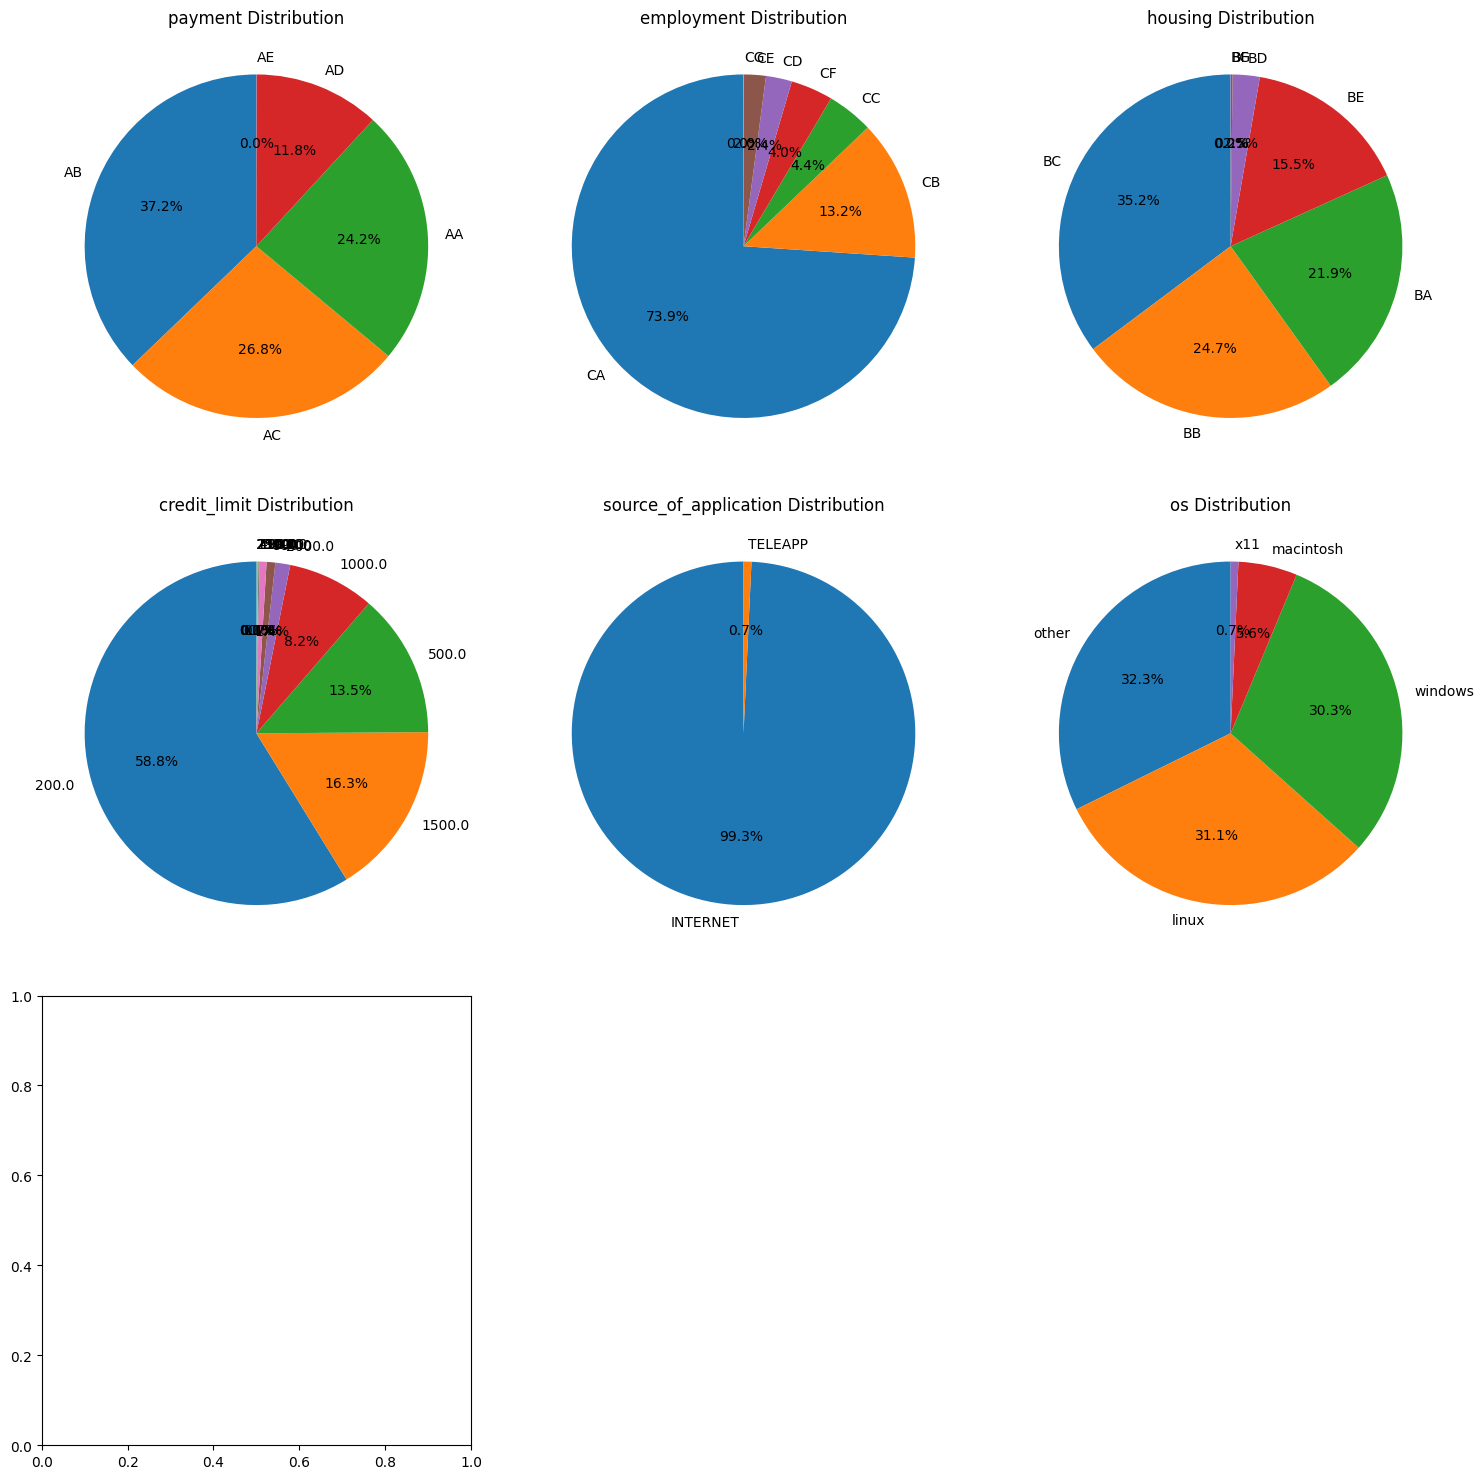

In [ ]:
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(categorical_cols):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df_train[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# Removing the 9th (2, 2) and 8th (2, 1) subplots
axs[2, 2].remove()
axs[2, 1].remove()

# show the plot
plt.show()

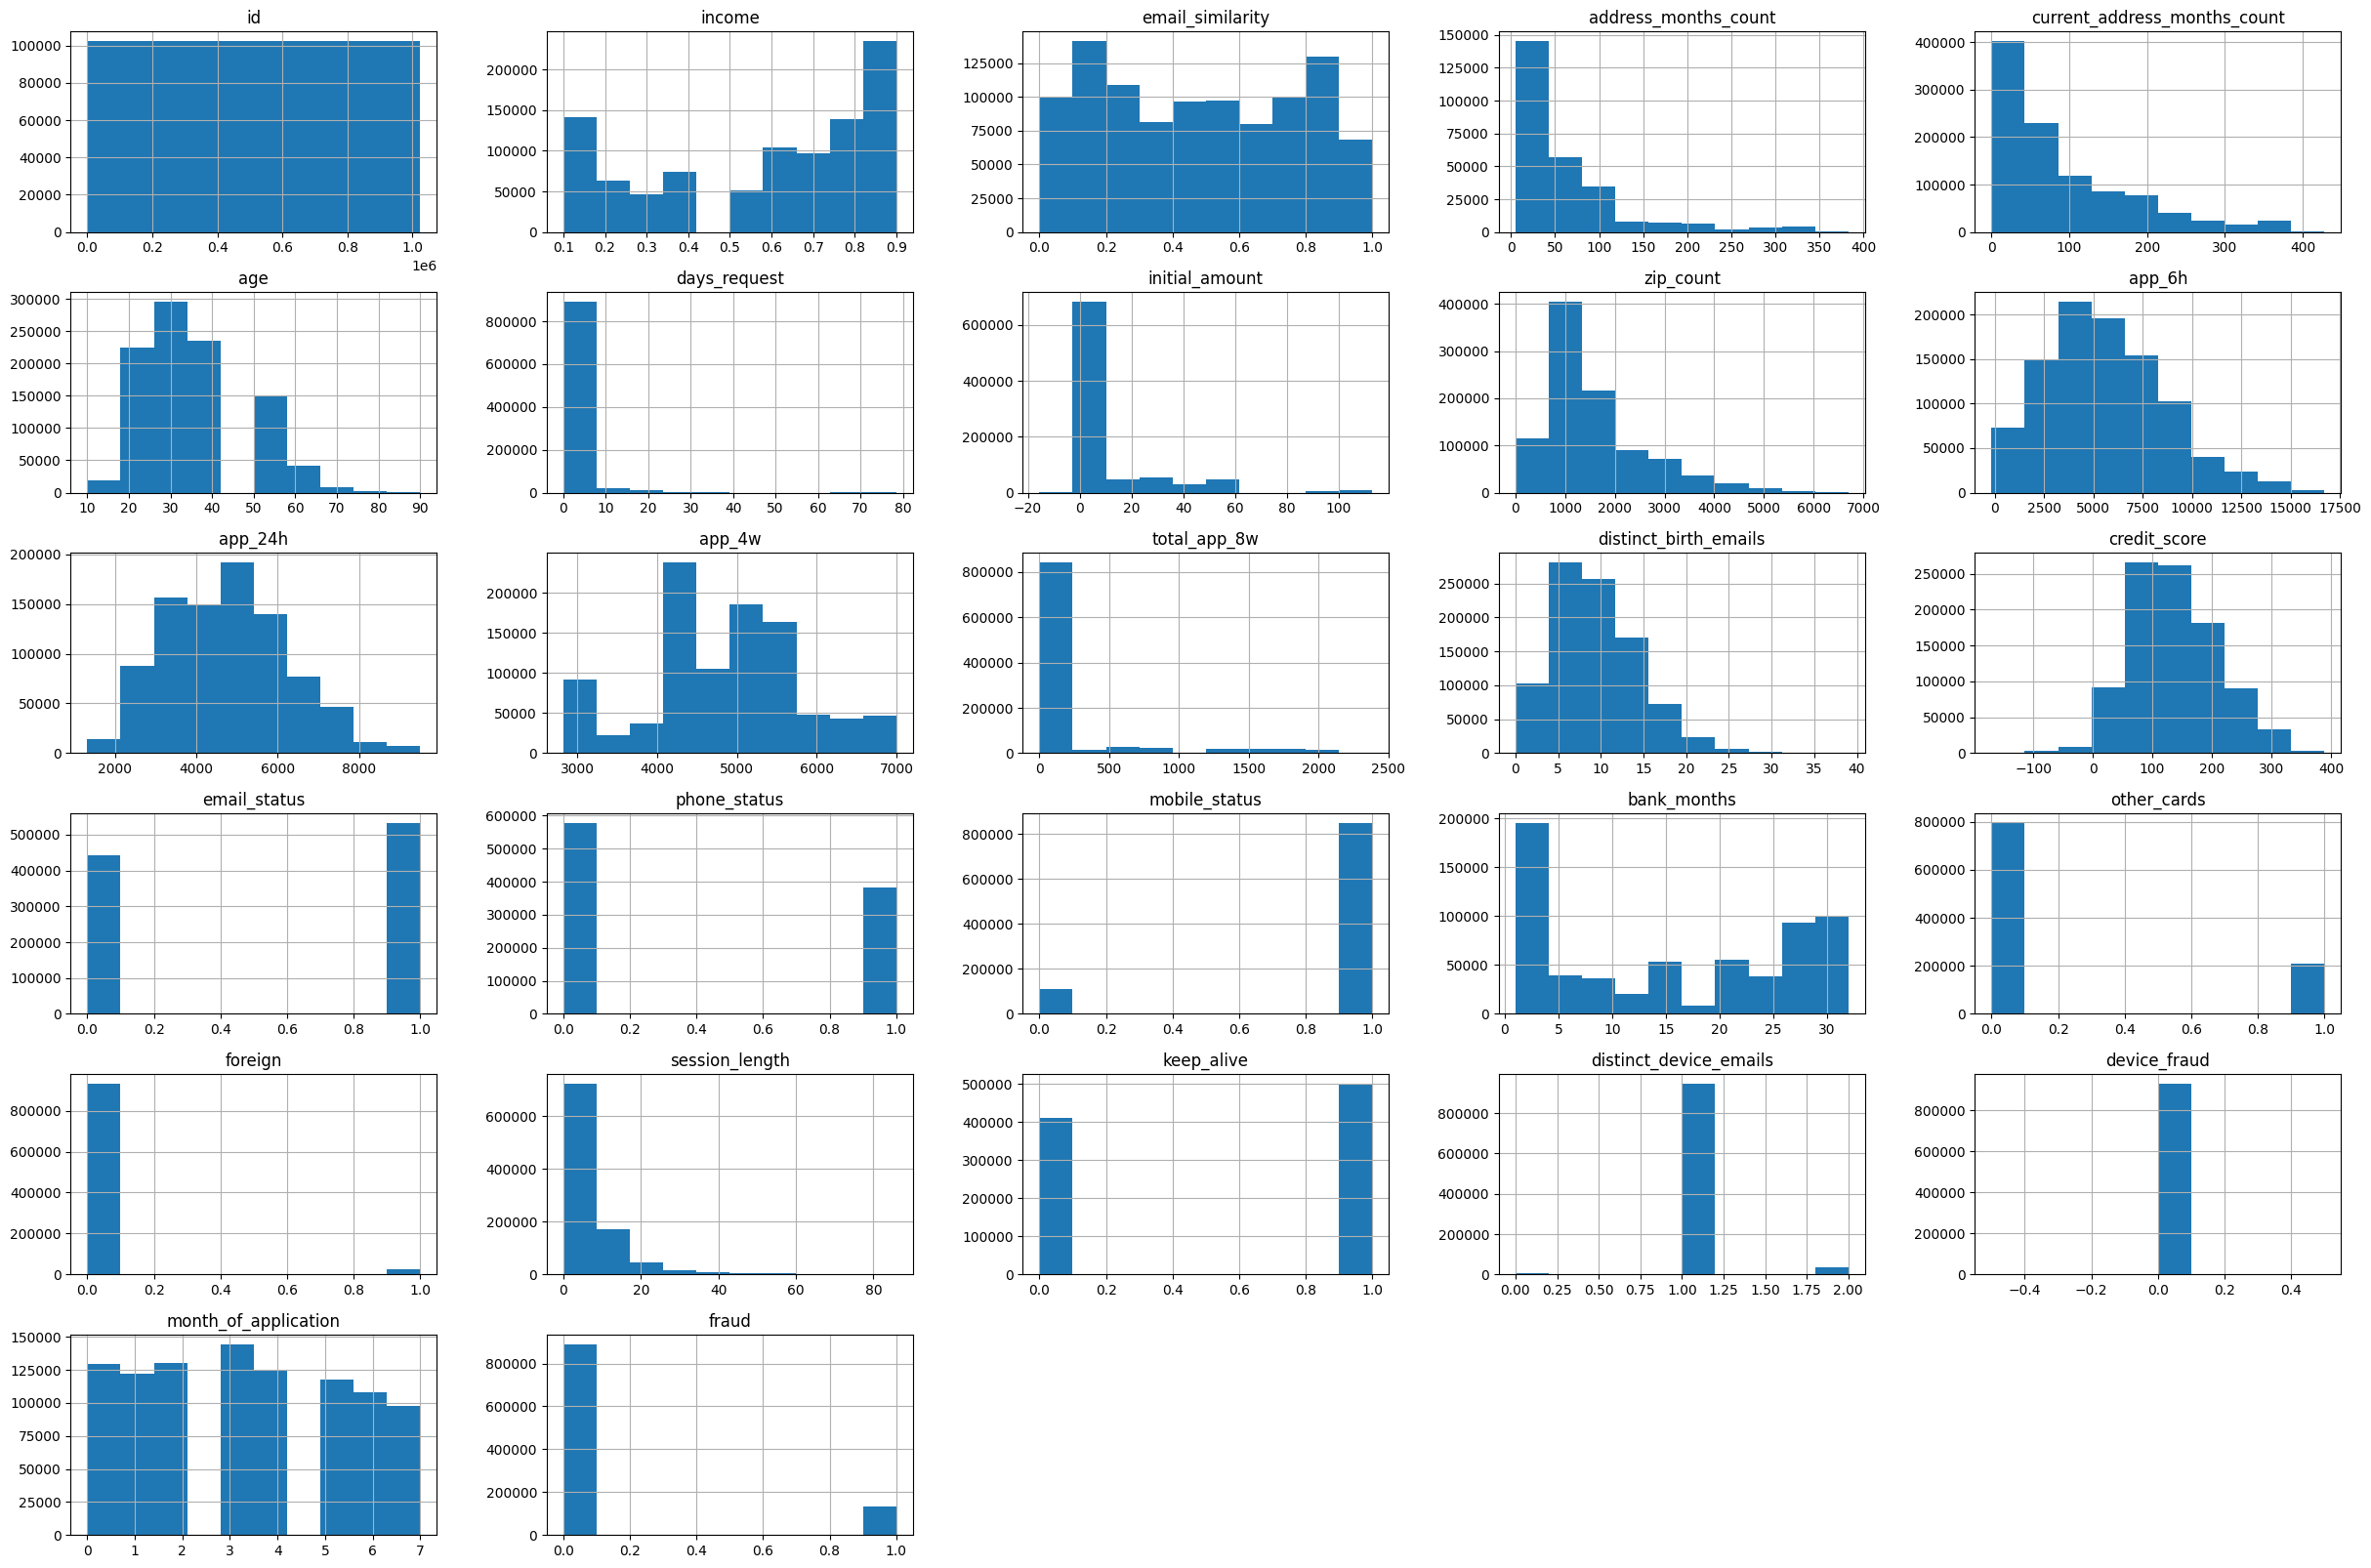

In [ ]:
# plots for the features distribution
df_train[numerical_cols].hist(figsize=(30,20))
plt.title("Features Distribution")
plt.show()



<ipython-input-84-ae2dd2332048>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), fmt='.2g', annot=True)


<Axes: >

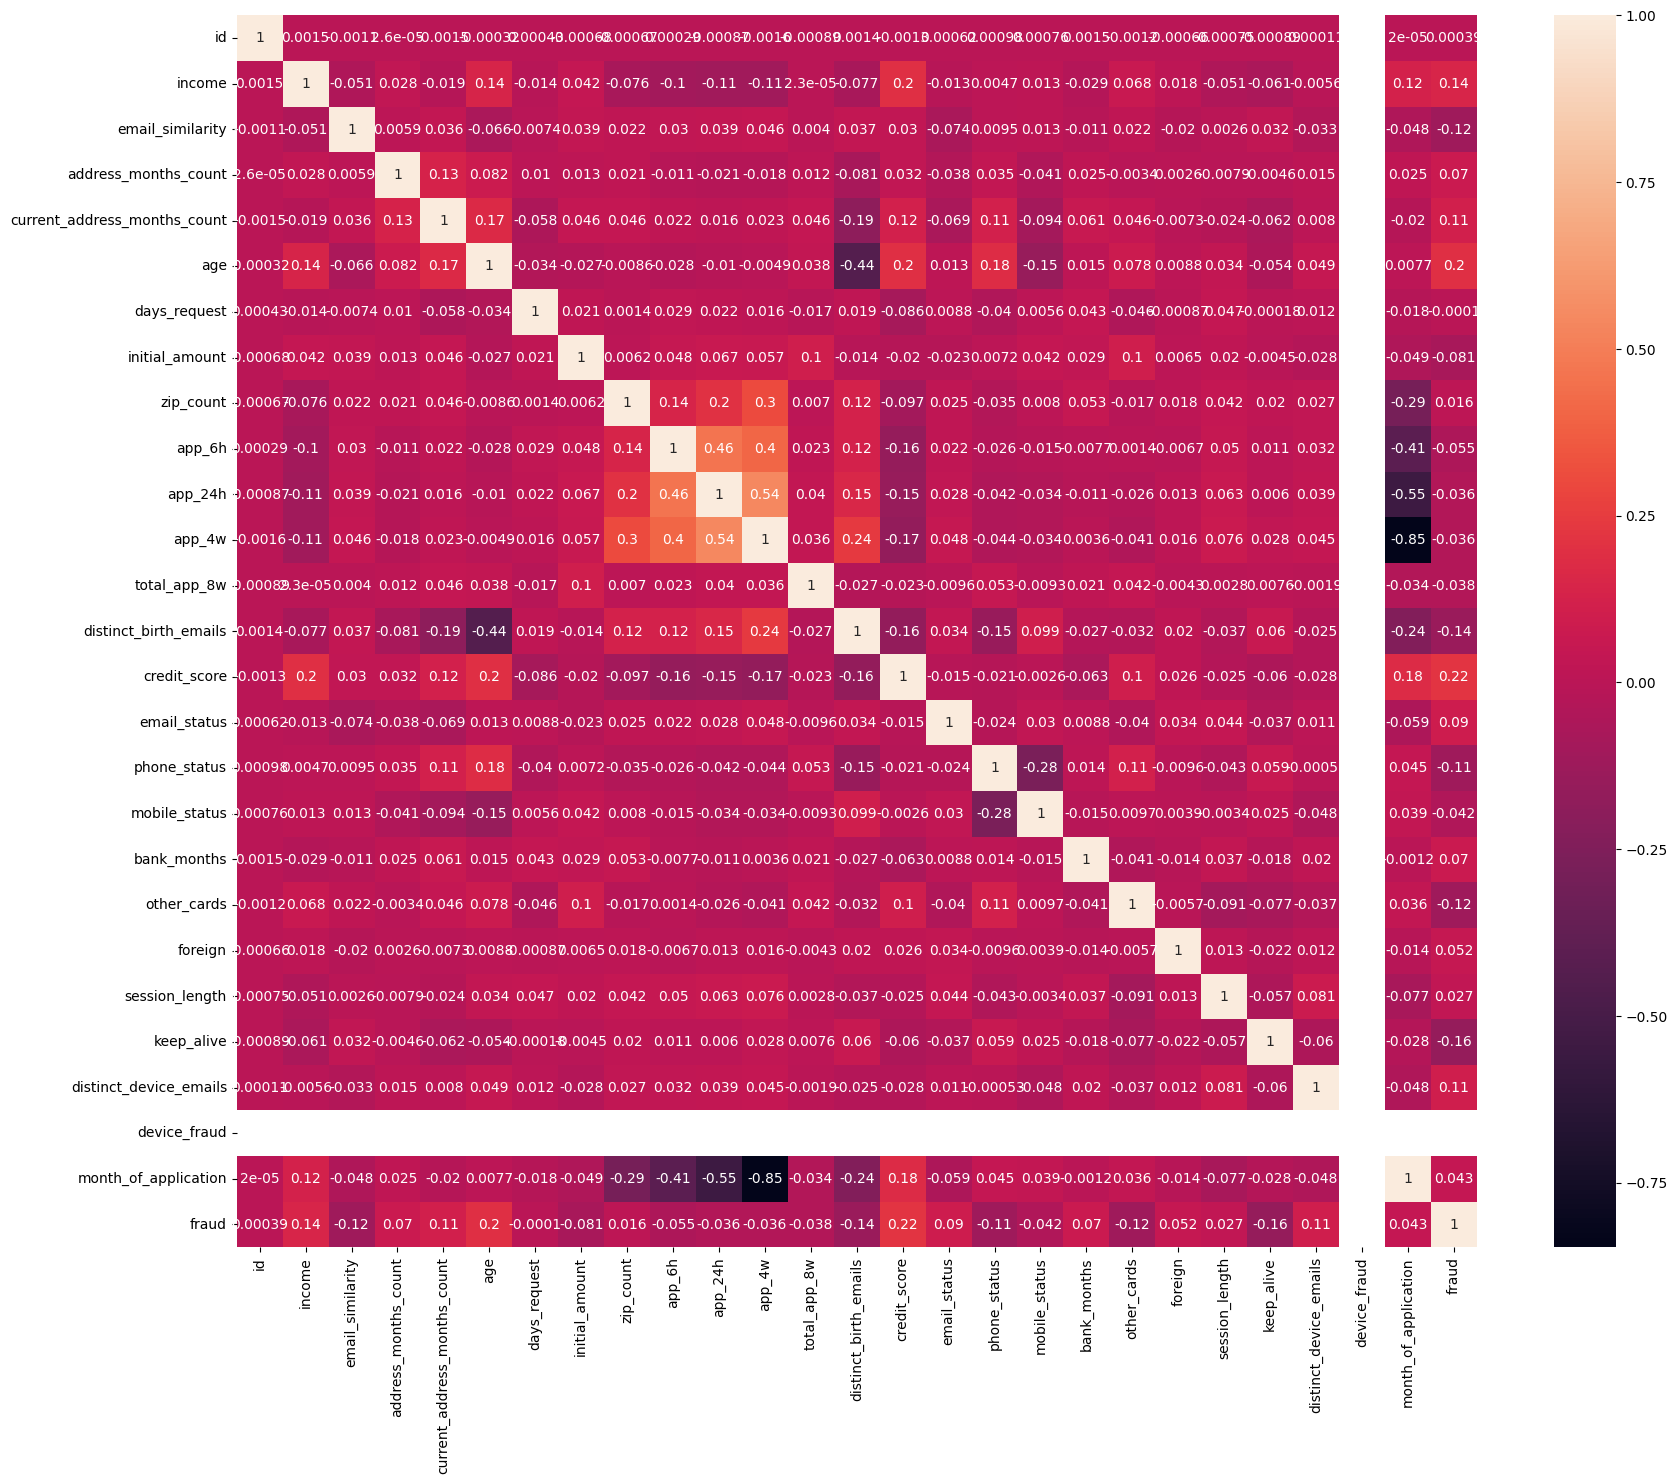

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_train.corr(), fmt='.2g', annot=True)

PREPROCESSING DATA

In [ ]:
#membuang data duplikat pada data test
df_test = df_test.drop_duplicates()

In [ ]:
#melihat informasi mengenai data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197795 entries, 0 to 197794
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            197795 non-null  int64  
 1   income                        191837 non-null  float64
 2   email_similarity              190489 non-null  float64
 3   address_months_count          197795 non-null  int64  
 4   current_address_months_count  197795 non-null  int64  
 5   age                           195278 non-null  float64
 6   days_request                  191319 non-null  float64
 7   initial_amount                190233 non-null  float64
 8   payment                       194400 non-null  object 
 9   zip_count                     191262 non-null  float64
 10  app_6h                        190793 non-null  float64
 11  app_24h                       191968 non-null  float64
 12  app_4w                        194296 non-nul

In [ ]:
#mengganti nilai -1 menjadi missing value
df_test.replace(-1, np.nan, inplace = True)

In [ ]:
#melihat missing value pada
df_test.isnull().sum()

id                                   0
income                            5958
email_similarity                  7306
address_months_count            161177
current_address_months_count       567
age                               2517
days_request                      6476
initial_amount                    7562
payment                           3395
zip_count                         6533
app_6h                            7002
app_24h                           5827
app_4w                            3499
total_app_8w                      8651
distinct_birth_emails             2946
employment                        6977
credit_score                      8014
email_status                      8476
housing                           7063
phone_status                      3884
mobile_status                     4976
bank_months                      65412
other_cards                       7078
credit_limit                      4353
foreign                           8455
source_of_application    

In [ ]:
#menambahkan kolom target pada data test untuk diisi dengan missing value
df_test['fraud'] = pd.NA

#menggabungkan data train dan data test
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
#melihat informasi dataframe df
df.head()

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,NaN,80.0,40.0,0.004258,-1.080257,AC,834.0,...,1000.0,0.0,INTERNET,3.596101,windows,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,NaN,272.0,30.0,0.018662,NaN,NaN,1296.0,...,1000.0,0.0,INTERNET,6.151814,other,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,NaN,121.0,40.0,0.006578,-1.403771,NaN,1471.0,...,1000.0,0.0,INTERNET,4.135402,other,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,NaN,40.0,20.0,0.016866,-1.225565,NaN,3281.0,...,200.0,0.0,INTERNET,3.394497,windows,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,NaN,194.0,50.0,0.020789,NaN,AB,1493.0,...,990.0,0.0,INTERNET,4.737753,windows,1.0,1.0,0.0,2.0,1


In [ ]:
#mengecek banyaknya missing value pada dataframe df
df.isna().sum()

id                                   0
income                           78959
email_similarity                 27081
address_months_count            916574
current_address_months_count      4527
age                              48397
days_request                     98568
initial_amount                  151696
payment                         100181
zip_count                        62156
app_6h                           63166
app_24h                         149686
app_4w                           47925
total_app_8w                     47128
distinct_birth_emails           109537
employment                       35006
credit_score                     91616
email_status                     55833
housing                          92357
phone_status                     68671
mobile_status                    68004
bank_months                     450375
other_cards                      28830
credit_limit                     23240
foreign                          72487
source_of_application    

In [ ]:
#menghilangkan kolom id dan address_month_count pada dataframe df
df = df.drop(['id','address_months_count'], axis = 1)

**PREPROCESSING DATA**

In [ ]:
#mencari mean untuk data numerik :
#current_address_months_count, zip_count, total_app_8w, distinct_birth_emails, credit_score, bank_months, credit_limit, device_fraud
med_curr_add = df['current_address_months_count'].median()
mean_zip = round(df['zip_count'].mean())
mean_8w = df['total_app_8w'].median()
med_birth_email = df['distinct_birth_emails'].median()
mean_credit = round(df['credit_score'].mean())
mean_bank_month = df['bank_months'].mean()
mean_device_fraud = round(df['device_fraud'].mean())
mean_dist_email = round(df['distinct_device_emails'].mean())

#income, email_similarity, age, days_request, initial_amount, app_6h, app_24h, app_4w, session_length
mean_income = df['income'].mean()
mean_email_sim = df['email_similarity'].mean()
mean_age = df['age'].mean()
mean_days_req = df['days_request'].mean()
mean_initial_amount = df['initial_amount'].mean()
mean_6h = df['app_6h'].mean()
mean_24h = df['app_24h'].mean()
mean_4w = df['app_4w'].mean()
mean_sess_length = df['session_length'].mean()

In [ ]:
#mengisi missing value pada data yang numerik
df['current_address_months_count']= df['current_address_months_count'].fillna(med_curr_add)
df['zip_count']= df['zip_count'].fillna(mean_zip)
df['total_app_8w']= df['total_app_8w'].fillna(mean_8w)
df['distinct_birth_emails']= df['distinct_birth_emails'].fillna(med_birth_email)
df['credit_score']= df['credit_score'].fillna(mean_credit)
df['bank_months']= df['bank_months'].fillna(mean_bank_month)
df['device_fraud']= df['device_fraud'].fillna(mean_device_fraud)
df['distinct_device_emails']= df['distinct_device_emails'].fillna(mean_dist_email)

df['income']= df['income'].fillna(mean_income)
df['email_similarity']= df['email_similarity'].fillna(mean_email_sim)
df['age']= df['age'].fillna(mean_age)
df['days_request']= df['days_request'].fillna(mean_days_req)
df['initial_amount']= df['initial_amount'].fillna(mean_initial_amount)
df['app_6h']= df['app_6h'].fillna(mean_6h)
df['app_24h']= df['app_24h'].fillna(mean_24h)
df['app_4w']= df['app_4w'].fillna(mean_4w)
df['session_length']= df['session_length'].fillna(mean_sess_length)


In [ ]:
#mengisi missing value data kategorik dengan nilai modus
df['payment'].fillna(df['payment'].mode()[0], inplace=True)
df['employment'].fillna(df['employment'].mode()[0], inplace=True)
df['email_status'].fillna(df['email_status'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['phone_status'].fillna(df['phone_status'].mode()[0], inplace=True)
df['mobile_status'].fillna(df['mobile_status'].mode()[0], inplace=True)
df['other_cards'].fillna(df['other_cards'].mode()[0], inplace=True)
df['foreign'].fillna(df['foreign'].mode()[0], inplace=True)
df['source_of_application'].fillna(df['source_of_application'].mode()[0], inplace=True)
df['os'].fillna(df['os'].mode()[0], inplace=True)
df['keep_alive'].fillna(df['keep_alive'].mode()[0], inplace=True)
df['month_of_application'].fillna(df['month_of_application'].mode()[0], inplace=True)
df['credit_limit'].fillna(df['credit_limit'].mode()[0], inplace=True)

In [ ]:
#mengubah tipe variabel credit limit menjadi object
df['credit_limit'] = df['credit_limit'].astype(object)

In [ ]:
#melihat informasi mengenai variabel credit limit
df['credit_limit'].value_counts()

200.0     712397
1500.0    205815
500.0     161980
1000.0     98004
2000.0     21670
990.0      10151
510.0       7456
1900.0      1975
490.0       1100
210.0        610
190.0        177
2100.0       150
Name: credit_limit, dtype: int64

In [ ]:
#mengecek kembali banyaknya nilai missing value pada dataframe df
df.isnull().sum()

income                               0
email_similarity                     0
current_address_months_count         0
age                                  0
days_request                         0
initial_amount                       0
payment                              0
zip_count                            0
app_6h                               0
app_24h                              0
app_4w                               0
total_app_8w                         0
distinct_birth_emails                0
employment                           0
credit_score                         0
email_status                         0
housing                              0
phone_status                         0
mobile_status                        0
bank_months                          0
other_cards                          0
credit_limit                         0
foreign                              0
source_of_application                0
session_length                       0
os                       

In [ ]:
#mengubah mapping dari data target
target_map = {1: 1, 0: 0}
df['fraud'] = df['fraud'].map(target_map)

In [ ]:
df.head()

,income,email_similarity,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,0.8,0.728457,80.0,40.0,0.004258,-1.080257,AC,834.0,2155.678440,4655.779025,...,1000.0,0.0,INTERNET,3.596101,windows,1.0,1.0,0.0,4.0,1.0
1,0.5,0.858082,272.0,30.0,0.018662,7.759371,AB,1296.0,8222.396714,6413.223022,...,1000.0,0.0,INTERNET,6.151814,other,0.0,1.0,0.0,3.0,0.0
2,0.9,0.814606,121.0,40.0,0.006578,-1.403771,AB,1471.0,8916.571104,5710.085555,...,1000.0,0.0,INTERNET,4.135402,other,1.0,1.0,0.0,0.0,1.0
3,0.8,0.730362,40.0,20.0,0.016866,-1.225565,AB,3281.0,3021.379314,4740.460862,...,200.0,0.0,INTERNET,3.394497,windows,0.0,1.0,0.0,0.0,0.0
4,0.1,0.032931,194.0,50.0,0.020789,7.759371,AB,1493.0,5388.378176,3932.569456,...,990.0,0.0,INTERNET,4.737753,windows,1.0,1.0,0.0,2.0,1.0


In [ ]:
df['fraud'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1221485 entries, 0 to 1221484
Series name: fraud
Non-Null Count    Dtype  
--------------    -----  
1023690 non-null  float64
dtypes: float64(1)
memory usage: 9.3 MB


In [ ]:
#mendefinisikan kolom kategorik pada dataframe
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_cols

['payment',
 'employment',
 'housing',
 'credit_limit',
 'source_of_application',
 'os']

In [ ]:
#mendefinisikan kolom numerik pada dataframe
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
numerical_cols

['income',
 'email_similarity',
 'current_address_months_count',
 'age',
 'days_request',
 'initial_amount',
 'zip_count',
 'app_6h',
 'app_24h',
 'app_4w',
 'total_app_8w',
 'distinct_birth_emails',
 'credit_score',
 'email_status',
 'phone_status',
 'mobile_status',
 'bank_months',
 'other_cards',
 'foreign',
 'session_length',
 'keep_alive',
 'distinct_device_emails',
 'device_fraud',
 'month_of_application',
 'fraud']

In [ ]:
#One hot encoding untuk kolom kategorik
OR_encoder = OneHotEncoder()
#tranformasi kolom kategorik
df_cat_encoded = OR_encoder.fit_transform(df[categorical_cols])
#memasukkan hasil transform ke dataframe
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=OR_encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Joining the numerical and categorical dfframes
df_encoded = pd.concat([df[numerical_cols], df_cat_encoded], axis=1)

# Check the result
df_encoded

,income,email_similarity,current_address_months_count,age,days_request,initial_amount,zip_count,app_6h,app_24h,app_4w,...,credit_limit_1900.0,credit_limit_2000.0,credit_limit_2100.0,source_of_application_INTERNET,source_of_application_TELEAPP,os_linux,os_macintosh,os_other,os_windows,os_x11
0,0.8,0.728457,80.0,40.0,0.004258,-1.080257,834.0,2155.678440,4655.779025,4879.933800,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.858082,272.0,30.0,0.018662,7.759371,1296.0,8222.396714,6413.223022,5065.417049,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.9,0.814606,121.0,40.0,0.006578,-1.403771,1471.0,8916.571104,5710.085555,4830.203628,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.730362,40.0,20.0,0.016866,-1.225565,3281.0,3021.379314,4740.460862,4826.835380,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.1,0.032931,194.0,50.0,0.020789,7.759371,1493.0,5388.378176,3932.569456,5222.155247,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221480,0.9,0.880862,176.0,30.0,0.001222,-0.268217,1315.0,9195.486853,4783.713735,4981.636814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1221481,0.8,0.475391,26.0,20.0,0.005481,15.111592,857.0,2001.747308,4373.348117,4310.909049,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1221482,0.6,0.910509,12.0,40.0,9.201864,-1.433794,1267.0,6392.083775,5989.183667,4602.342516,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1221483,0.3,0.240353,223.0,20.0,0.002781,-1.261012,939.0,1236.779413,3230.834403,3727.771084,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#melakukan scaling untuk data age
columns_to_scale = ['age']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

df_encoded = pd.concat([df_encoded.drop(columns_to_scale, axis=1), scaled_df], axis=1)
df_encoded

,income,email_similarity,current_address_months_count,days_request,initial_amount,zip_count,app_6h,app_24h,app_4w,total_app_8w,...,credit_limit_2000.0,credit_limit_2100.0,source_of_application_INTERNET,source_of_application_TELEAPP,os_linux,os_macintosh,os_other,os_windows,os_x11,age
0,0.8,0.728457,80.0,0.004258,-1.080257,834.0,2155.678440,4655.779025,4879.933800,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.406886
1,0.5,0.858082,272.0,0.018662,7.759371,1296.0,8222.396714,6413.223022,5065.417049,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.406788
2,0.9,0.814606,121.0,0.006578,-1.403771,1471.0,8916.571104,5710.085555,4830.203628,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.406886
3,0.8,0.730362,40.0,0.016866,-1.225565,3281.0,3021.379314,4740.460862,4826.835380,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.220462
4,0.1,0.032931,194.0,0.020789,7.759371,1493.0,5388.378176,3932.569456,5222.155247,800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.220560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221480,0.9,0.880862,176.0,0.001222,-0.268217,1315.0,9195.486853,4783.713735,4981.636814,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.406788
1221481,0.8,0.475391,26.0,0.005481,15.111592,857.0,2001.747308,4373.348117,4310.909049,21.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.220462
1221482,0.6,0.910509,12.0,9.201864,-1.433794,1267.0,6392.083775,5989.183667,4602.342516,9.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.406886
1221483,0.3,0.240353,223.0,0.002781,-1.261012,939.0,1236.779413,3230.834403,3727.771084,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.220462


**MODELLING DATA**

In [ ]:
#memisahkan data train dan data test
train = df_encoded.loc[:1023689]
test = df_encoded.loc[1023690:]

In [ ]:
#melihat informasi mengenai data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023690 entries, 0 to 1023689
Data columns (total 63 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   income                          1023690 non-null  float64
 1   email_similarity                1023690 non-null  float64
 2   current_address_months_count    1023690 non-null  float64
 3   days_request                    1023690 non-null  float64
 4   initial_amount                  1023690 non-null  float64
 5   zip_count                       1023690 non-null  float64
 6   app_6h                          1023690 non-null  float64
 7   app_24h                         1023690 non-null  float64
 8   app_4w                          1023690 non-null  float64
 9   total_app_8w                    1023690 non-null  float64
 10  distinct_birth_emails           1023690 non-null  float64
 11  credit_score                    1023690 non-null  float64
 12  

In [ ]:
#mendefinisikan kolom X dan y pada data train
X = train.drop('fraud', axis=1)
y = train['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=16)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=16)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.04 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9803749181881234
Precision Score :  0.9803749181881234
Recall Score :  0.9803749181881234
Jaccard Score :  0.9615052980513135
Log Loss :  0.7073596465603491


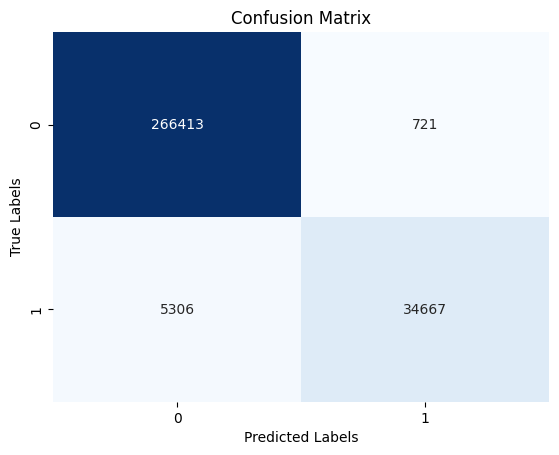

In [ ]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set labels, title, and ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(np.arange(len(cm))+0.5, labels=["0", "1"])
plt.yticks(np.arange(len(cm))+0.5, labels=["0", "1"])

# Show the plot
plt.show()

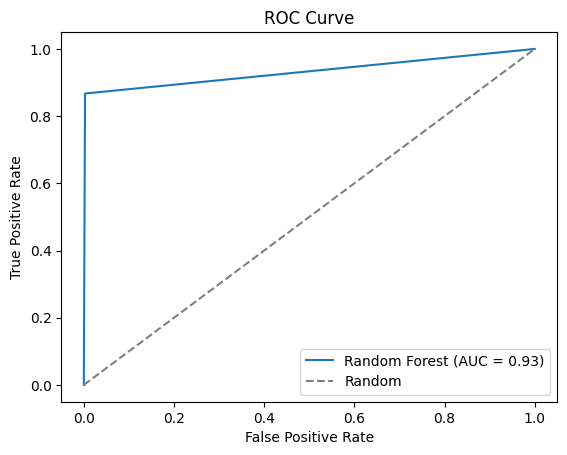

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the AUC score
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show the plot
plt.show()

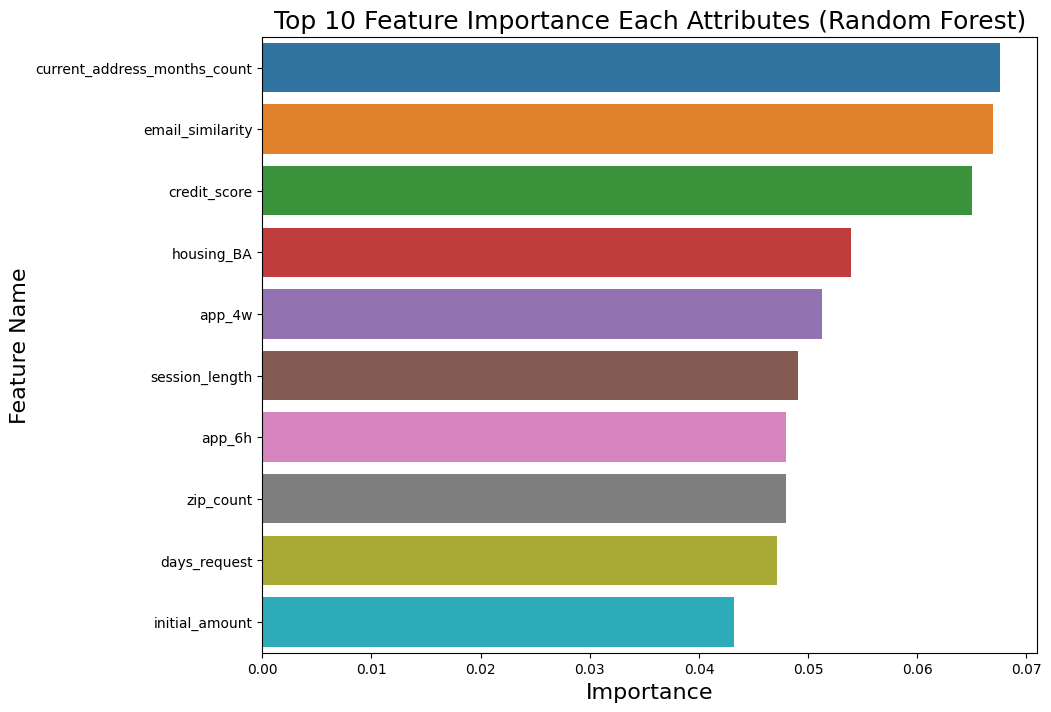

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
#mendefinisikan variabel independen pada data test
x_test = test.drop('fraud', axis=1)

In [ ]:
#melihat informasi dari variabel independen pada data test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197795 entries, 1023690 to 1221484
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   income                          197795 non-null  float64
 1   email_similarity                197795 non-null  float64
 2   current_address_months_count    197795 non-null  float64
 3   days_request                    197795 non-null  float64
 4   initial_amount                  197795 non-null  float64
 5   zip_count                       197795 non-null  float64
 6   app_6h                          197795 non-null  float64
 7   app_24h                         197795 non-null  float64
 8   app_4w                          197795 non-null  float64
 9   total_app_8w                    197795 non-null  float64
 10  distinct_birth_emails           197795 non-null  float64
 11  credit_score                    197795 non-null  float64
 12  email_sta

In [ ]:
#memprediksi variabel dependen dari data test
y_pred_final = rfc.predict(x_test)

In [ ]:
#menghitung persebaran data yang diprediksi
y_pred_final = pd.Series(y_pred_final)
y_pred_final.value_counts()

0.0    103857
1.0     93938
dtype: int64

In [ ]:
# Membuat dictionary untuk mapping label baru
label_mapping = {0: 'Not Fraud', 1: 'Fraud'}

# Mengubah label data pada y_pred
y_pred_rf = np.vectorize(label_mapping.get)(y_pred_final)


In [ ]:
y_pred_rf = pd.Series(y_pred_rf)
y_pred_rf.value_counts()

Not Fraud    103857
Fraud         93938
dtype: int64

In [ ]:
df_test_final = pd.DataFrame({'Status': y_pred_rf})

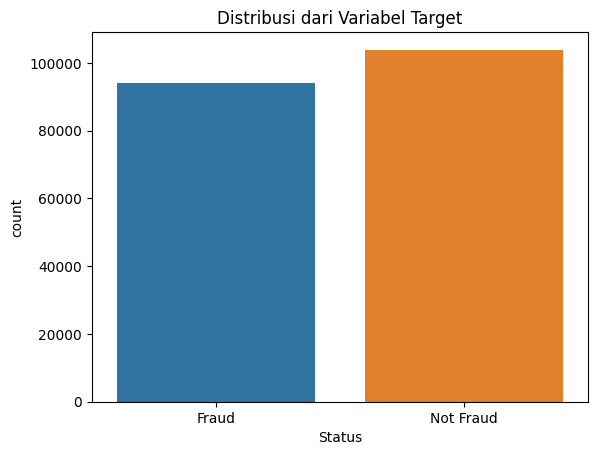

In [ ]:
#melihat distribusi dari variabel target
sns.countplot(x=df_test_final['Status'], data=df_test_final)
plt.title("Distribusi dari Variabel Target")
plt.show()

In [ ]:
id_list = list(range(1023691, 1221486))

data = {'id': id_list}

output = pd.DataFrame(data)

df_pred = pd.concat([output, y_pred_rf.rename('fraud')], axis=1)

In [ ]:
df_pred

,id,fraud
0,1023691,Fraud
1,1023692,Fraud
2,1023693,Fraud
3,1023694,Not Fraud
4,1023695,Fraud
...,...,...
197790,1221481,Fraud
197791,1221482,Not Fraud
197792,1221483,Not Fraud
197793,1221484,Not Fraud


In [ ]:
df_pred.to_csv('bismillah5.csv', index=False)